In [1]:
# Reads the filtered ERA5 U and V fields and plots the maps of eddy kinetic energy at
# selected levels. Also marks the locations of interest along the Northern and
# Southern tracks 
#
# NSCU Large Scale and Tropical Dynamics
#
#--------------------------------------------------------------------------------
# Easterly Waves Diagnostics Project
#--------------------------------------------------------------------------------
# A. Thornton & A. Aiyyer
# Sep, 2023
#
#--------------------------------------------------------------------------------
# Notes
#
# The AEW Stormtrack is visualized by these EKE maps at 600 and 850 hPa levels
# At the 600 hPa, the EKE is maximized to the south of the climatological AEJ. So, 
# this is called the Southern AEW Stormtrack
# At the 850 hPa, the EKE is maximized to the north of the climatological AEJ. So, 
# this is called the Southern AEW Stormtrack
#
# In general, the 850 AEW stormtrack is shallow (i.e. confined to low levels) and dry
# while the southern AEW stormtrack is deep and associated with precipitation
#
#
# We also mark some locations along the northern and southern stormtracks for additional
# diagnostics.

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmaps
import cartopy

import geocat.viz as gv
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

from datetime import datetime, date


In [2]:
# path to the data
data_path = '/glade/scratch/athornton/era5_processed_data/filtered_era5_full_fields/'


In [3]:
year_start  = 1998
year_end    = 2022

In [10]:
# locations of base points for our composites


# Northern Track based on 850 hPa V Variance
stormTrackLons_N = [-50., -34., -20., -11., 0., 14., 30.]
stormTrackLats_N = [12., 12., 18., 21.5, 21.5 , 21.5, 16.]


# Southern Track based on 600 hPa V Variance

stormTrackLons_S = [-50., -34., -22., -11., 0., 14., 30. ]
stormTrackLats_S = [12., 12., 12., 12., 9., 8, 8.]


In [5]:
# read the filtered u and v

In [6]:

# first the 850 hPa V and U
data_files  = [ data_path + '850/v_850_filtered_' + str(year) + '.nc' for year in range(year_start,year_end+1) ]
dsV = xr.open_mfdataset(data_files)

data_files  = [ data_path + '850/u_850_filtered_' + str(year) + '.nc' for year in range(year_start,year_end+1) ]
dsU = xr.open_mfdataset(data_files)
eke850 = .5*(dsU.U_prime**2 + dsV.V_prime**2).mean(dim='time').compute()

In [7]:
# next the 600 hPa V and U
data_files  = [ data_path + '600/v_600_filtered_' + str(year) + '.nc' for year in range(year_start,year_end+1) ]
dsV = xr.open_mfdataset(data_files)

data_files  = [ data_path + '600/u_600_filtered_' + str(year) + '.nc' for year in range(year_start,year_end+1) ]
dsU = xr.open_mfdataset(data_files)
eke600 = .5*(dsU.U_prime**2 + dsV.V_prime**2).mean(dim='time').compute()

In [8]:
print(eke600.min().values, eke600.max().values )
print(eke850.min().values, eke850.max().values )

0.15266543113224867 16.267400165653008
0.004157555577278108 13.205939716161147


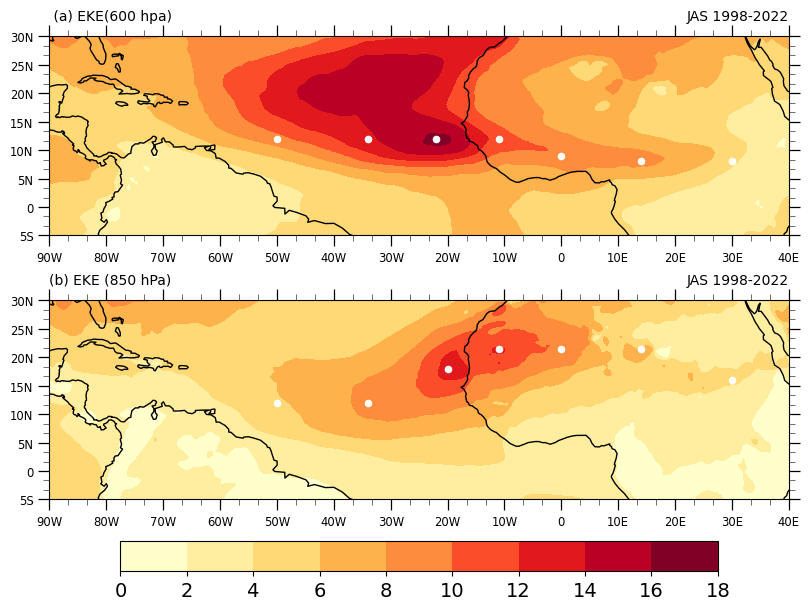

In [11]:
minlon =  -90.
maxlon =   40.
minlat =   -5.
maxlat =   30.

projection = ccrs.PlateCarree()
fig, ax = plt.subplots(2,
                       1,
                       constrained_layout=True,
                       subplot_kw={"projection": projection})


# Set figure size (width, height) in inches
fig.set_size_inches((12,6))

# Add continents
continents = cartopy.feature.NaturalEarthFeature(name="coastline",
                                                 category="physical",
                                                 scale="110m",
                                                 edgecolor="black",
                                                 facecolor="none")
[axes.add_feature(continents) for axes in ax.flat]


# Import an NCL colormap
cmap = 'YlOrRd'

# Specify which contour levels to draw
contour_lev = np.arange(0,20,2.)
# Plot filled contour

# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(xlim=(minlon, maxlon),
              ylim=(minlat, maxlat),
              xticks=np.linspace(minlon, maxlon, 14),
              yticks=np.linspace(minlat, maxlat,8),
              transform=projection,  # ds projection
              add_colorbar=False,  # don't add individual colorbars for each plot call
              add_labels=False,  # turn off xarray's automatic Lat, lon labels
)



# Plot filled contour
plot_600 = eke600.plot.contourf(ax=ax[0],levels=contour_lev,cmap=cmap,**kwargs)


# Panel 2 (Subplot 2)
plot_850 = eke850.plot.contourf(ax=ax[1],cmap=cmap,levels=contour_lev,**kwargs)
cbar = plt.colorbar(plot_850,ax=ax[1],
                    orientation='horizontal',
                    shrink=0.7,
                    pad=0.06, #
                    extendrect=True,
                    extendfrac='auto')

# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=0)


# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax[0])
gv.add_major_minor_ticks(ax[1])

# Use geocat.viz.util convenience function to make plots look like NCL plots by
# using latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax[0])
gv.add_lat_lon_ticklabels(ax[1])

# Remove the degree symbol from tick labels
ax[0].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[0].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
ax[1].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[1].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to set titles and labels
gv.set_titles_and_labels(ax[0],
                         lefttitle=" (a) EKE(600 hpa)",
                         righttitle="JAS 1998-2022",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)
gv.set_titles_and_labels(ax[1],
                         lefttitle="(b) EKE (850 hPa)",
                         righttitle="JAS 1998-2022",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)


# Mark the locations of the points that we are interested in (for composites and budgets)
# marker size is controlled by s

ax[0].scatter(stormTrackLons_S,stormTrackLats_S,s=20,transform=ccrs.PlateCarree(), facecolor='white')
ax[1].scatter(stormTrackLons_N,stormTrackLats_N,s=20,transform=ccrs.PlateCarree(), facecolor='white')


#plt.savefig("variance.png")